Menggabungkan Data Overview + Visualization + Data Preprocessing + Modeling

Version 1 : https://colab.research.google.com/drive/1y46NTvT-_4Awdotzk1Ayyx90dnp4cdW8#scrollTo=MLK15PZ6tvrq (Raw Project) <br>
Version 2 : https://colab.research.google.com/drive/137-VWWJjM7wU7B2qGcMOTAxf6piYyIMd?authuser=2#scrollTo=O1fLBNNEJR_F (Exploring preprocessing + New algoritm) <br>
Version 3 : https://colab.research.google.com/drive/139vWgLk9Ll__R-qSvPPy4XOciJKoxi6l?authuser=2 (Explore with/without Feature engineering + Encoding)
Version 4 :  **CURRENTLY HERE** (Very Minimal Preprocessing + Without Feature Engineering)

# Import Data

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [ ]:
filepath = 'https://raw.githubusercontent.com/Pieter414/BCCInternProject/main/shopping_behavior_updated.csv'

data = pd.read_csv(filepath, delimiter=',')

In [ ]:
data.to_csv('data.csv', index=False)

# Data Understanding

Tujuan Exploratory Data Analysis (EDA)


1. Memahami Data

2. Identifikasi Anomali

3. Identifikasi Pola dan Tren

4. Eksplorasi Hubungan

- Measure of Central Tendency: mean, median, modus
- Measure of Spread: variabilitas, varian, standar deviasi
- Measure of Distribution: skewness dan kurtosis

## Penjelasan Kolom

**About Dataset**

> Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction. This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

**Dataset Glossary (Column-wise)**

> `Customer ID`: A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

> `Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

> `Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

> `Item Purchased`: The specific product or item selected by the customer during the transaction.

> `Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

> `Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

> `Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

> `Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

> `Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

> `Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

> `Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

> `Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

> `Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

> `Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

> `Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

> `Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

> `Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

> `Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

## Data overview

In [ ]:
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [ ]:
data.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
data.shape

(3900, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
data.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [ ]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Analisis Value Counts (Persebaran Data)

Pertama, ambil terlebih dahulu semua kolom object

In [ ]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [ ]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

In [ ]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [ ]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [ ]:
show_value_count(data, 'Item Purchased')


Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


In [ ]:
for column in object_columns:
  show_value_count(data, column)


Persebaran dari kolom Gender: 
Male      2652
Female    1248
Name: Gender, dtype: int64

Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Persebaran dari kolom Category: 
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Persebaran dari kolom Location: 
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86

In [ ]:
for column in float_columns:
  show_value_count(data, column)


Persebaran dari kolom Review Rating: 
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64


In [ ]:
for column in integer_columns:
  show_value_count(data, column)


Persebaran dari kolom Customer ID: 
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64

Persebaran dari kolom Age: 
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

Persebaran dari kolom Purchase Amount (USD): 
94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

Persebaran dari kolom Previous Purchases: 
31    97
21    96
14  

## Missing Values

In [ ]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Disimpulkan bahwa dataset ini tidak memiliki missing value di kolom manapun

## Duplicated values

In [ ]:
data.duplicated().sum()

0

In [ ]:
duplicate_without_id = (data.drop(columns=["Customer ID"]))
duplicate_without_id.duplicated().sum()

0

In [ ]:
data[data.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [ ]:
duplicate_without_id[duplicate_without_id.duplicated()]

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


Dari diatas, ditemukan bahwa tidak ada data yang duplikat. Bahkan setelah mengecek data tanpa Customer ID, ditemukan tidak ada duplikat

# Business Question / Insight

SMART Method

- Specific
- Measurable
- Action Oriented
- Relevant
- Time Bound

# Pre Visualization and Analysis

Creating numerical data, categorical data and creating new column that maybe be usefull

## Num Data

In [ ]:
num_data = data.filter(integer_columns+float_columns)
num_data.head()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Review Rating
0,1,55,53,14,3.1
1,2,19,64,2,3.1
2,3,50,73,23,3.1
3,4,21,90,49,3.5
4,5,45,49,31,2.7


## Region Grouping

In [ ]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [ ]:
# Fungsi untuk menentukan region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [ ]:
# Menambahkan kolom region ke dataframe
data['Region'] = data['Location'].apply(get_region)

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Southeast
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,New England
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New England
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,New England
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Far West


In [ ]:
data.to_csv('data.csv', index=False)

In [ ]:
data["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

In [ ]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region']

In [ ]:
category_data = data.filter(object_columns)
category_data.head()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases,Region
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly,Southeast
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly,New England
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly,New England
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly,New England
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually,Far West


## Age Grouping

In [ ]:
# Define a function to classify age groups
def classify_age_group(age):
  if age <= 19:
      return 'Teenager'
  elif 20 <= age <= 30:
      return 'Young_Adult'
  elif 31 <= age <= 44:
      return 'Adult'
  elif 45 <= age <= 59:
      return 'Middle_Age'
  else:
      return 'Elder'

In [ ]:
# Define a function to classify age groups
def classify_birth_year_group(age):
  birth_year = 2024 - age
  if birth_year >= 2013:
      return 'Gen Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen Z'
  elif 1980 <= birth_year <= 1994:
      return 'Millenials'
  elif 1965 <= birth_year <= 1979:
      return 'Gen X'
  else:
      return 'Baby Boomer'

# Apply the function to create a new column 'Age_group'
data['Age Group'] = data['Age'].apply(classify_age_group)
# Apply the function to create a new column 'Age_group'
data['Generation'] = data['Age'].apply(classify_birth_year_group)

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region,Age Group,Generation
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Southeast,Middle_Age,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,New England,Teenager,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New England,Middle_Age,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,New England,Young_Adult,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Far West,Middle_Age,Gen X


In [ ]:
data["Age Group"].value_counts()

Middle_Age     1142
Adult          1021
Young_Adult     799
Elder           788
Teenager        150
Name: Age Group, dtype: int64

In [ ]:
data["Generation"].value_counts()

Gen X          1142
Millenials     1092
Gen Z           878
Baby Boomer     788
Name: Generation, dtype: int64

# Preprocessing

In [ ]:
process_data = data.copy()
process_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Bagi jadi tiga,
nan_process_data,
nan_encoding_data,
processed_data,

## Drop Useless Column

In [ ]:
def drop_column(data, all_columns):
  clean_data = data.drop(columns=all_columns)
  return clean_data

In [ ]:
min_df = drop_column(process_data.copy(), ["Customer ID"])
min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

## Splitting Categorical Value into Indicator Value

In [ ]:
# Method for preprocessing
def prep(df):

  # Convert kategorikal ke variabel indikator
  df_dummies_freq = pd.get_dummies(df['Frequency of Purchases'])
  df_dummies_reg = pd.get_dummies(df['Region'])
  df_dummies_age = pd.get_dummies(df['Age Group'])

  # Menggabungkan DataFrame asli dengan DataFrame hasil get_dummies
  df = pd.concat([df, df_dummies_freq, df_dummies_reg, df_dummies_age], axis=1)

  # Hapus kolom yang sudah di convert
  df.drop(columns=['Frequency of Purchases', 'Region', 'Age Group'], axis=1, inplace=True)

  return df

In [ ]:
# min_df = prep(min_df)
# sep = processed_data.iloc[:, 13:]
# sep.head()

,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest,Adult,Elder,Middle_Age,Teenager,Young_Adult
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Annually        3900 non-null   uint8
 1   Bi-Weekly       3900 non-null   uint8
 2   Every 3 Months  3900 non-null   uint8
 3   Fortnightly     3900 non-null   uint8
 4   Monthly         3900 non-null   uint8
 5   Quarterly       3900 non-null   uint8
 6   Weekly          3900 non-null   uint8
 7   Far West        3900 non-null   uint8
 8   Great Lakes     3900 non-null   uint8
 9   Mideast         3900 non-null   uint8
 10  New England     3900 non-null   uint8
 11  Plains          3900 non-null   uint8
 12  Rocky Mountain  3900 non-null   uint8
 13  Southeast       3900 non-null   uint8
 14  Southwest       3900 non-null   uint8
 15  Adult           3900 non-null   uint8
 16  Elder           3900 non-null   uint8
 17  Middle_Age      3900 non-null   uint8
 18  Teenager        3900 non-nul

In [ ]:
column_types = min_df.dtypes

In [ ]:
object_columns = column_types[column_types == 'object'].index.tolist()
object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

## Splitting Categorical Value

In [ ]:
# separate the two processor

In [ ]:
# menggunakan LabelEncoding untuk nan_process_data
le = LabelEncoder()

for column in object_columns:
  min_df[column] = le.fit_transform(min_df[column])

min_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


## Splitting Features and Target

In [ ]:
X_train = min_df.drop('Age', axis=1)
y_train = min_df['Age']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape, "\n")

X_train shape: (3900, 16)
y_train shape: (3900,) 



## Data transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X_train.columns)

In [ ]:
X_train.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0.685994,-1.394144,-0.002002,-0.285629,-0.576399,-1.203814,-0.707620,1.349198,-0.907584,1.644294,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575
1,0.685994,1.523236,-0.002002,0.178852,-0.436944,-1.203814,-0.015163,1.349198,-0.907584,1.644294,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575
2,0.685994,-0.143839,-0.002002,0.558882,-0.297488,0.945854,-0.015163,-0.441163,-0.907584,1.644294,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849
3,0.685994,0.272930,1.113356,1.276716,0.957614,-0.128980,-0.015163,-0.441163,-0.349027,1.644294,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849
4,0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.128980,1.231259,-0.441163,-1.466141,1.644294,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699


## Feature Selection Using Correlation

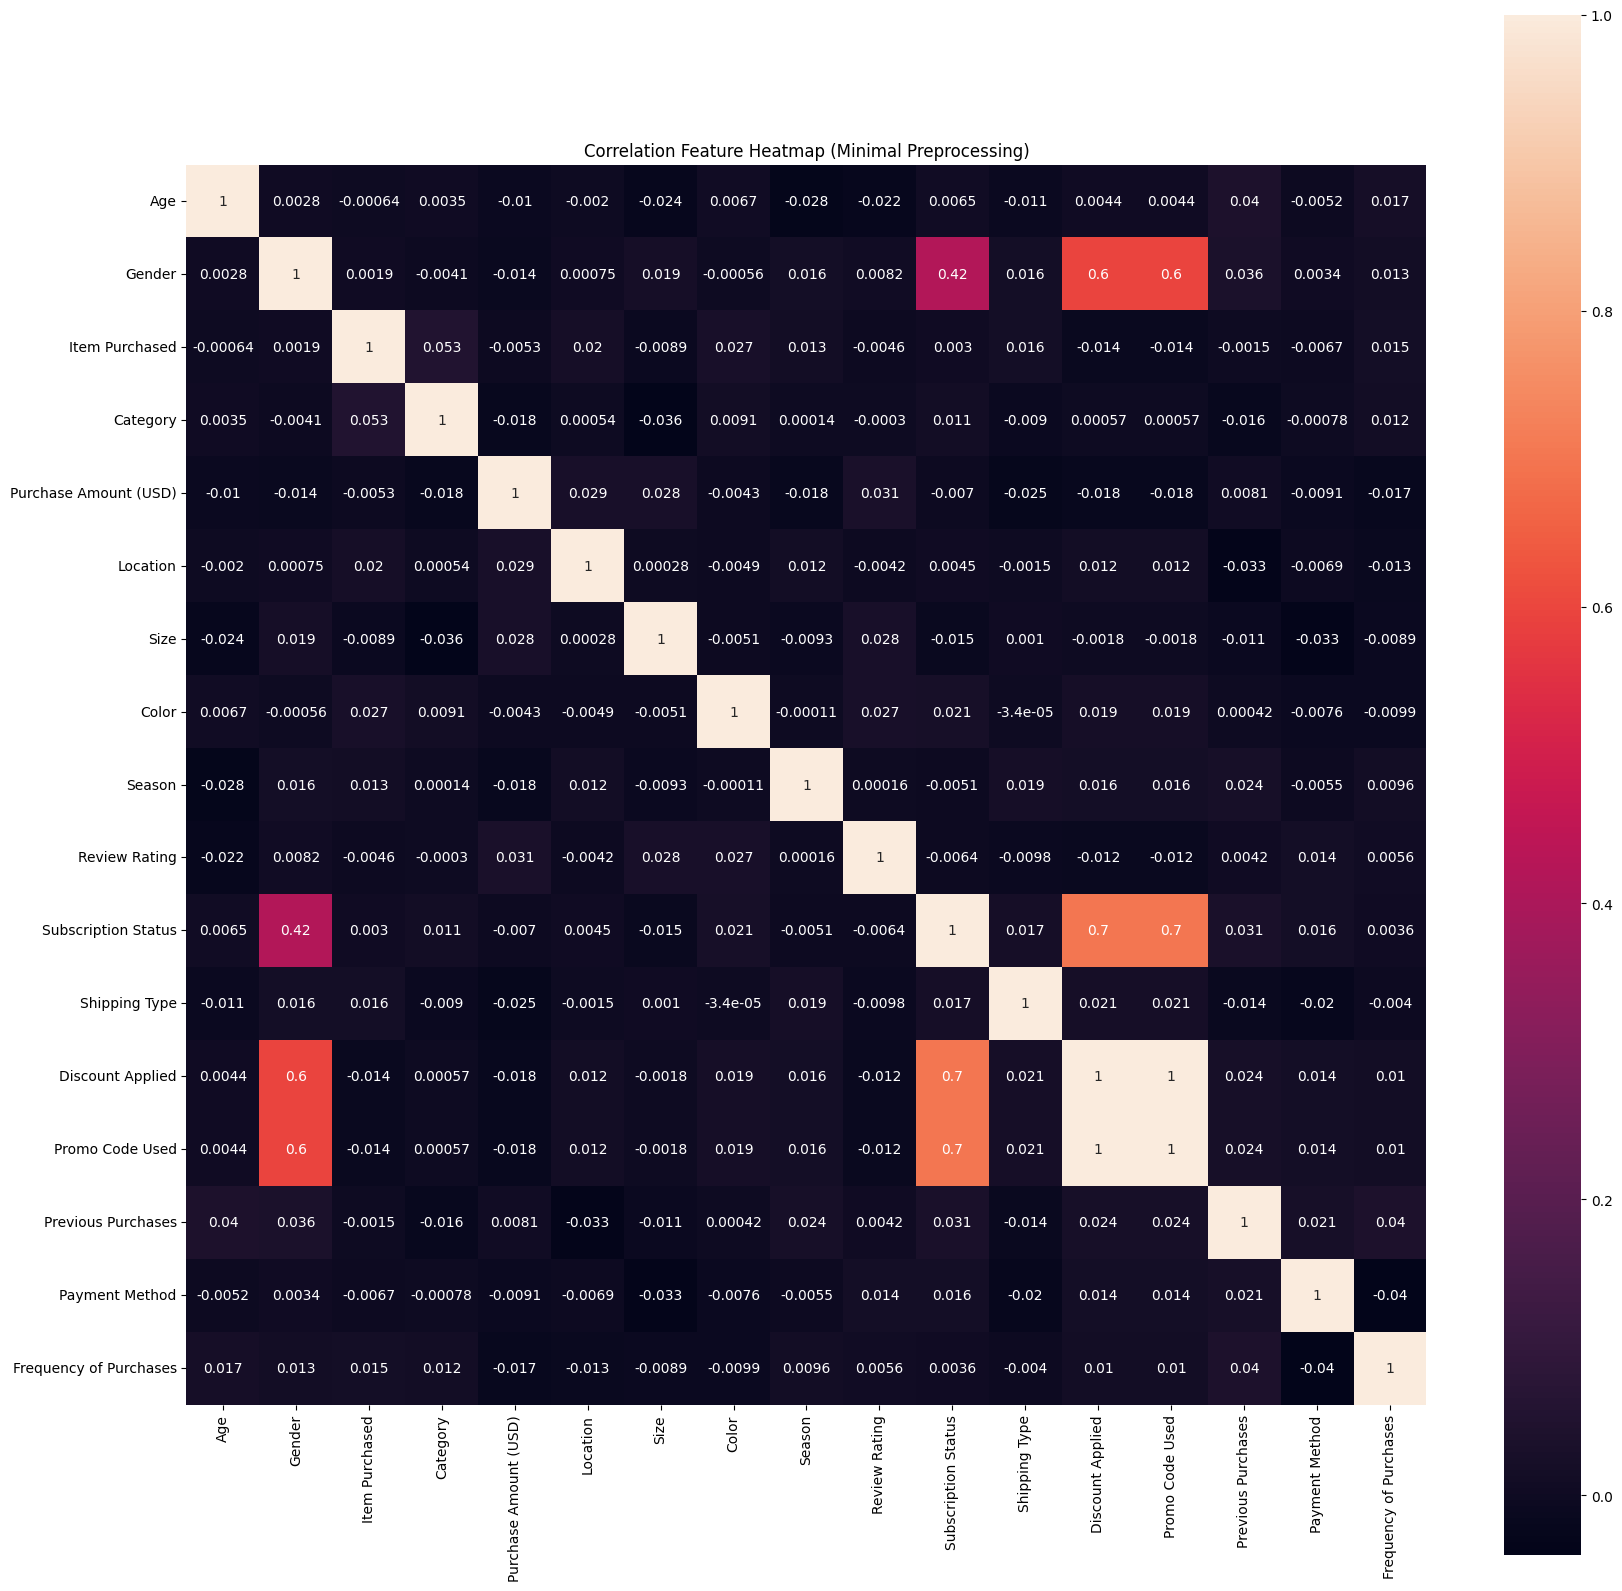

In [ ]:
corrmat = min_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);
plt.title('Correlation Feature Heatmap (Minimal Preprocessing)');
plt.show()

## Feature Selection Using Embedded Method

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def calculate_inertia(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    return kmeans.inertia_

def feature_importance_kmeans(X, k):
    baseline_inertia = calculate_inertia(X, k)
    importances = []
    for feature in range(X.shape[1]):
        X_subset = np.delete(X, feature, axis=1)
        inertia = calculate_inertia(X_subset, k)
        importance = baseline_inertia - inertia
        importances.append(importance)
    return importances

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

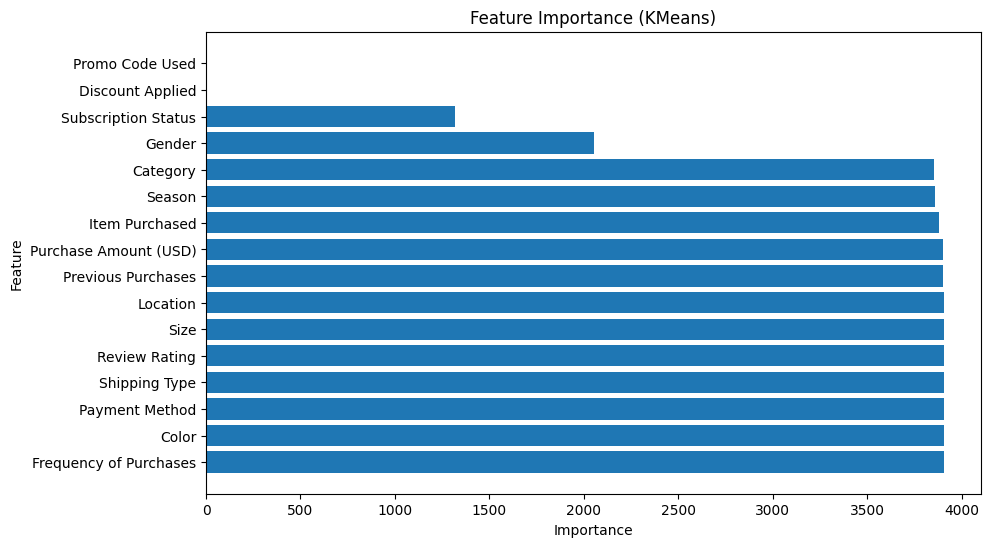

In [ ]:
# Example usage:
X = X_train.values
k = 5  # Number of clusters
feature_importances = feature_importance_kmeans(X, k)

# Create DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (KMeans)')
plt.show()

## Feature Selection PCA Algorithm (Num Data)

Numerical Data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame with numerical columns only
# num_nan_process = pd.DataFrame(nan_process_data["Age", "Purchase Amount (USD)"])
# Standardizing the features
X_process = StandardScaler().fit_transform(min_df)

# Performing PCA
pca = PCA(n_components=4)  # Adjust n_components based on your needs
principalComponents = pca.fit_transform(X_process)

# Creating a DataFrame with the principal components
df_pca_nan = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'P4'])

In [ ]:
df_pca_nan

,PC1,PC2,PC3,P4
0,2.323077,-0.605227,1.048209,-1.890443
1,2.248167,-0.155960,-1.968107,-0.134771
2,2.312333,0.003186,0.522332,0.959525
3,2.372281,-0.512686,-0.197307,0.616284
4,2.365392,0.276022,0.291909,-2.020566
...,...,...,...,...
3895,-1.780537,-1.299558,0.328938,-0.569657
3896,-1.794355,0.089526,1.096243,0.352230
3897,-1.786159,-0.780552,1.204562,-1.360966
3898,-1.865337,-0.587940,0.152458,0.362492


In [ ]:
# Getting the absolute values of the loadings
loadings_abs = abs(pca.components_)

# Sorting the loadings and getting the indices
sorted_indices = loadings_abs.argsort(axis=1)[:, ::-1]

# Getting the feature names
feature_names = min_df.columns

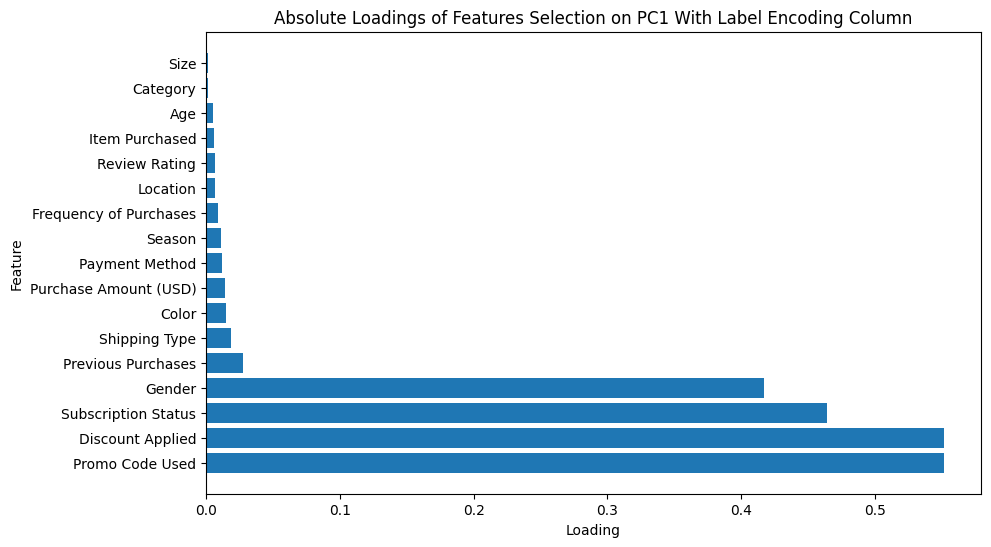

In [ ]:
# Get the indices of features sorted by their loadings
sorted_indices_pc1 = np.argsort(-loadings_abs[0])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), loadings_abs[0, sorted_indices_pc1], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices_pc1])
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.title('Absolute Loadings of Features Selection on PC1 With Label Encoding Column')
plt.show()

Just The Num Data

In [ ]:
# Assuming df is your DataFrame with numerical columns only
num_df = min_df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
# Standardizing the features
X_process = StandardScaler().fit_transform(num_df)

# Performing PCA
pca = PCA(n_components=4)  # Adjust n_components based on your needs
principalComponents = pca.fit_transform(X_process)

# Creating a DataFrame with the principal components
df_pca_nan = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'P4'])

In [ ]:
df_pca_nan

,PC1,PC2,PC3,P4
0,-0.679571,-0.875270,0.614511,0.658878
1,1.410280,-1.771317,0.922706,-0.457249
2,-0.420109,-0.106255,1.059586,0.064985
3,0.587576,1.135377,0.641926,-2.164980
4,-1.097818,-0.705935,0.517618,-0.735760
...,...,...,...,...
3895,-0.218962,-0.258706,-1.510175,-0.286120
3896,-0.472555,1.044618,-1.196806,0.047971
3897,-1.045337,-1.233821,-0.037709,-0.307054
3898,0.349887,0.390339,0.508452,0.100101


In [ ]:
# Getting the absolute values of the loadings
loadings_abs = abs(pca.components_)

# Sorting the loadings and getting the indices
sorted_indices = loadings_abs.argsort(axis=1)[:, ::-1]

# Getting the feature names
feature_names = num_df.columns

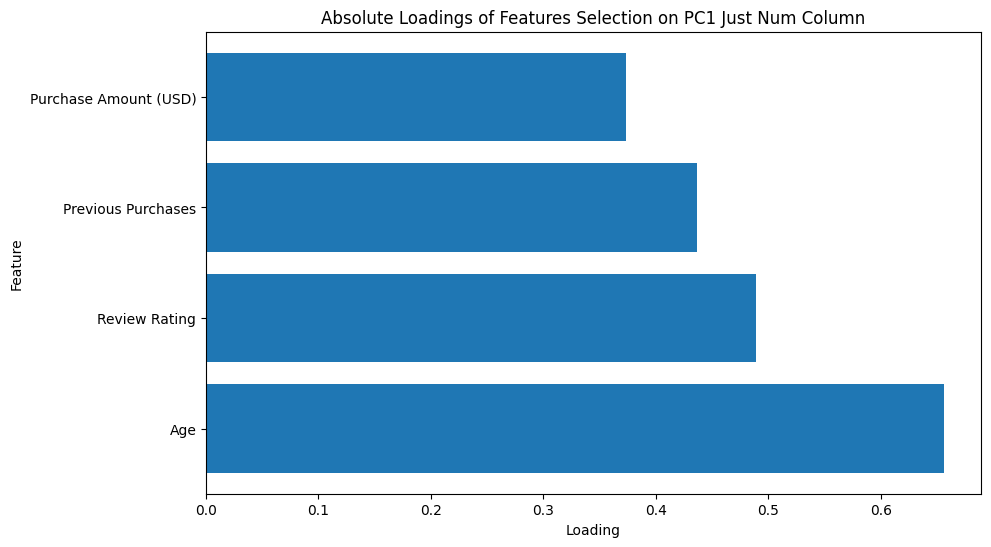

In [ ]:
# Get the indices of features sorted by their loadings
sorted_indices_pc1 = np.argsort(-loadings_abs[0])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), loadings_abs[0, sorted_indices_pc1], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices_pc1])
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.title('Absolute Loadings of Features Selection on PC1 Just Num Column')
plt.show()

## Chi Square Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_data = min_df.copy()

In [ ]:
chi_data.nunique()

Age                       53
Gender                     2
Item Purchased            25
Category                   4
Purchase Amount (USD)     81
Location                  50
Size                       4
Color                     25
Season                     4
Review Rating             26
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Previous Purchases        50
Payment Method             6
Frequency of Purchases     7
dtype: int64

In [ ]:
all = list(chi_data.columns)
all.remove("Age")
all.remove("Purchase Amount (USD)")
all.remove("Previous Purchases")
all.remove("Review Rating")

In [ ]:
chi_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


In [ ]:
X = chi_data[all]
y = chi_data[["Purchase Amount (USD)"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
f_score = chi2(X_train, y_train)

In [ ]:
f_score

(array([ 20.25240301, 356.89850847,  53.85539325, 750.09008161,
         57.86095936, 331.57135308,  71.40122056,  67.46968704,
         88.64577147,  50.56984226,  50.56984226, 123.93903186,
        102.981321  ]),
 array([1.00000000e+000, 1.27704780e-036, 9.89096358e-001, 1.76690767e-109,
        9.70625538e-001, 2.33554913e-032, 7.42985557e-001, 8.39932324e-001,
        2.38044267e-001, 9.95861140e-001, 9.95861140e-001, 1.19488644e-003,
        4.28251251e-002]))

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns

In [ ]:
pvalues = pvalues.sort_values(ascending=True)
pvalues

Location                  1.766908e-109
Item Purchased             1.277048e-36
Color                      2.335549e-32
Payment Method             1.194886e-03
Frequency of Purchases     4.282513e-02
Shipping Type              2.380443e-01
Season                     7.429856e-01
Subscription Status        8.399323e-01
Size                       9.706255e-01
Category                   9.890964e-01
Discount Applied           9.958611e-01
Promo Code Used            9.958611e-01
Gender                     1.000000e+00
dtype: float64

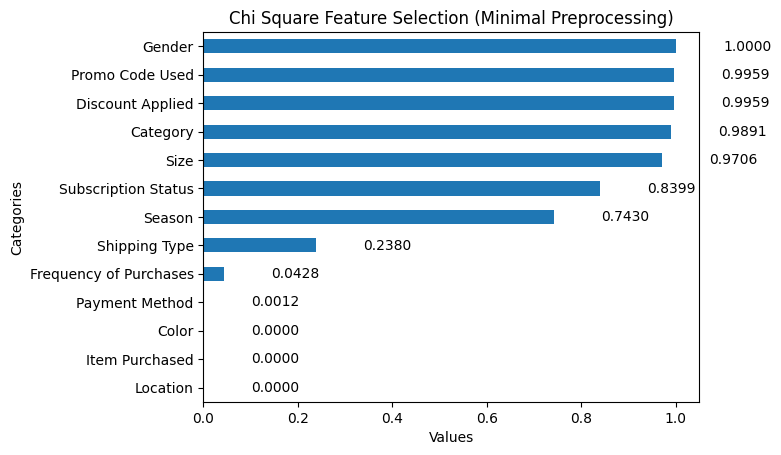

In [ ]:
ax = pvalues.plot(kind='barh')

# Adding labels to each bar
for i, v in enumerate(pvalues):
    ax.text(v + 0.1, i, "{:.4f}".format(v), ha='left', va='center')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Chi Square Feature Selection (Minimal Preprocessing)')

# Display the plot
plt.show()

## Preparing Model Evaluation

In [ ]:
clus_score = pd.DataFrame(columns=["Model", "Silhouette Score"])

In [ ]:
X_column = 'Age'
y_column = 'Review Rating'

# Modeling (All Preprocessing)

## Preparing

In [ ]:
X = min_df[[
    "Gender",
    "Category",
    "Size",
    "Promo Code Used",
    "Discount Applied",
    "Frequency of Purchases",
    "Age", "Review Rating"]]
X.head()

,Gender,Category,Size,Promo Code Used,Discount Applied,Frequency of Purchases,Age,Review Rating
0,1,1,0,1,1,3,55,3.1
1,1,1,0,1,1,3,19,3.1
2,1,1,2,1,1,6,50,3.1
3,1,2,1,1,1,6,21,3.5
4,1,1,1,1,1,0,45,2.7


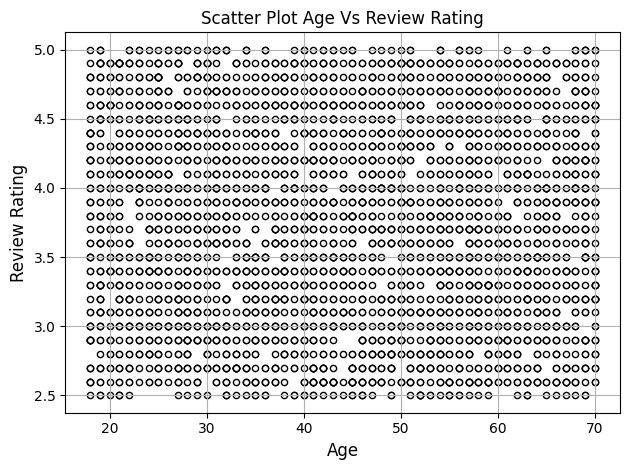

In [ ]:
plt.scatter(min_df[X_column],
            min_df[y_column],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.tight_layout()
plt.show()

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

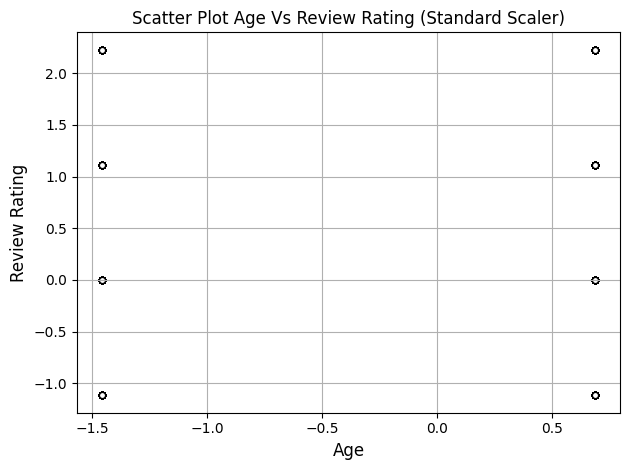

In [ ]:
plt.scatter(X_scaled[:, 0],
            X_scaled[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title(f"Scatter Plot {X_column} Vs {y_column} (Standard Scaler)")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled_mm = scaler.transform(X)

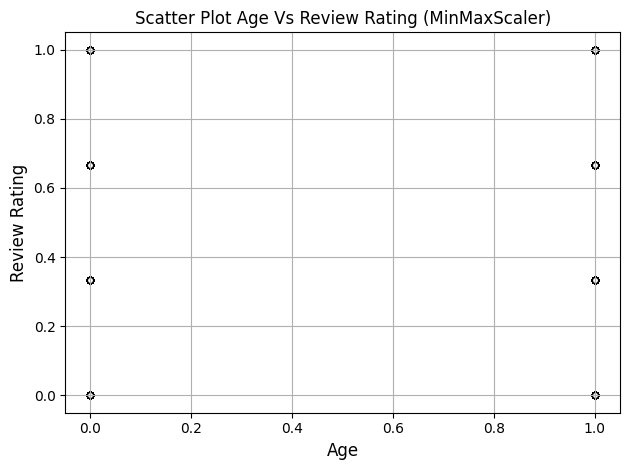

In [ ]:
plt.scatter(X_scaled_mm[:, 0],
            X_scaled_mm[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=20)
plt.grid()
plt.title(f"Scatter Plot {X_column} Vs {y_column} (MinMaxScaler)")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.tight_layout()
plt.show()

## KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

# n_init : cara inisilisasi
km = KMeans(n_clusters=4, random_state=0, n_init="auto")
km.fit(X_scaled)

y_km = km.predict(X_scaled)

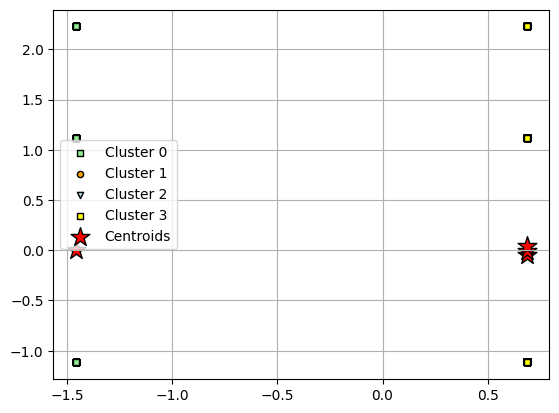

In [ ]:
plt.scatter(X_scaled[y_km == 0, 0],
            X_scaled[y_km == 0, 1],
            s=20,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 0')

plt.scatter(X_scaled[y_km == 1, 0],
            X_scaled[y_km == 1, 1],
            s=20, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X_scaled[y_km == 2, 0],
            X_scaled[y_km == 2, 1],
            s=20, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X_scaled[y_km == 3, 0],
            X_scaled[y_km == 3, 1],
            s=20, c='yellow',
            marker='s',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

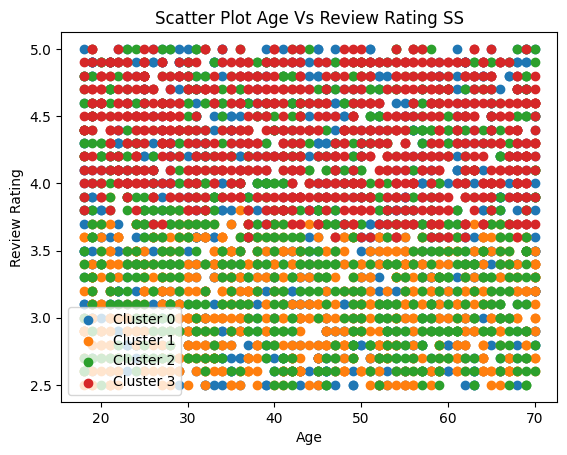

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_km)
for label in unique_labels:
    plt.scatter(X[y_km == label][X_column], X[y_km == label][y_column], label=f'Cluster {label}')

plt.title(f"Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
km_mm = KMeans(n_clusters=4, random_state=0, n_init="auto")
km_mm.fit(X_scaled_mm)

y_km_mm = km_mm.predict(X_scaled_mm)

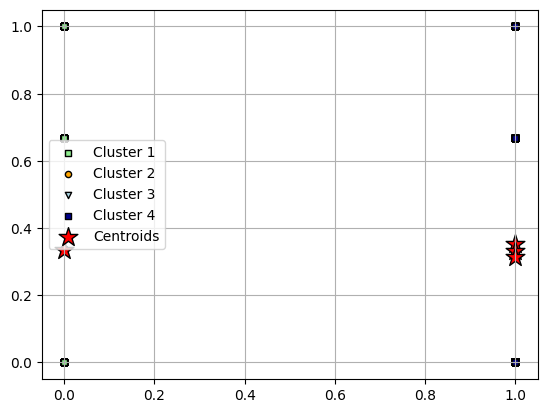

In [ ]:
plt.scatter(X_scaled_mm[y_km_mm == 0, 0],
            X_scaled_mm[y_km_mm == 0, 1],
            s=20,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X_scaled_mm[y_km_mm == 1, 0],
            X_scaled_mm[y_km_mm == 1, 1],
            s=20, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X_scaled_mm[y_km_mm == 2, 0],
            X_scaled_mm[y_km_mm == 2, 1],
            s=20, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(X_scaled_mm[y_km_mm == 3, 0],
            X_scaled_mm[y_km_mm == 3, 1],
            s=20, c='darkblue',
            marker='s',
            edgecolor='black',
            label='Cluster 4')

plt.scatter(km_mm.cluster_centers_[:, 0],
            km_mm.cluster_centers_[:, 1],
            s=200, marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()

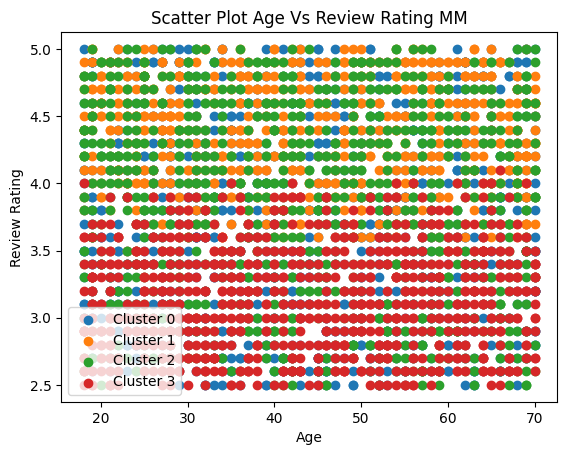

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_km_mm)
for label in unique_labels:
    plt.scatter(X[y_km_mm == label][X_column], X[y_km_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

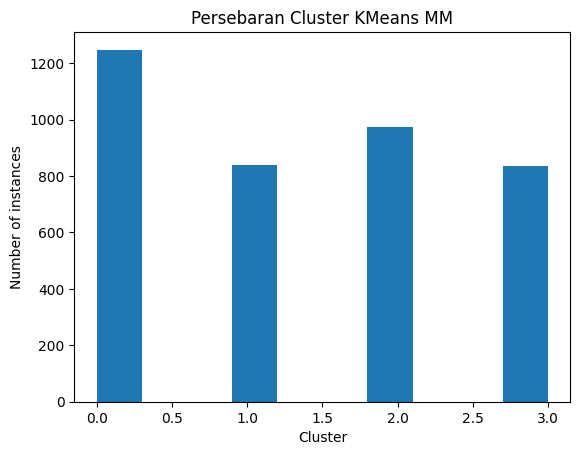

In [ ]:
plt.hist(y_km_mm)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster KMeans MM')
plt.show()

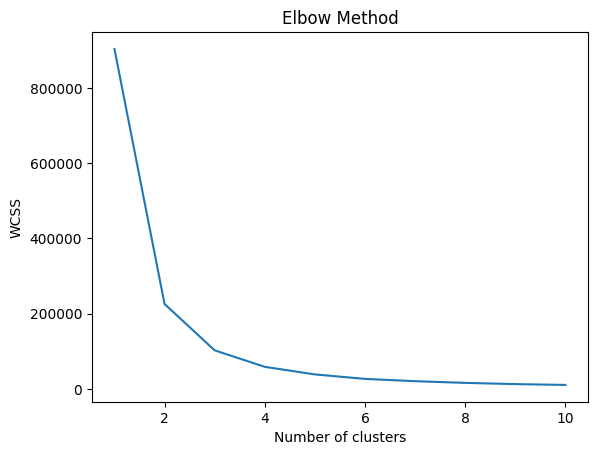

In [ ]:
from sklearn.cluster import KMeans

features = process_data[[X_column, y_column]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

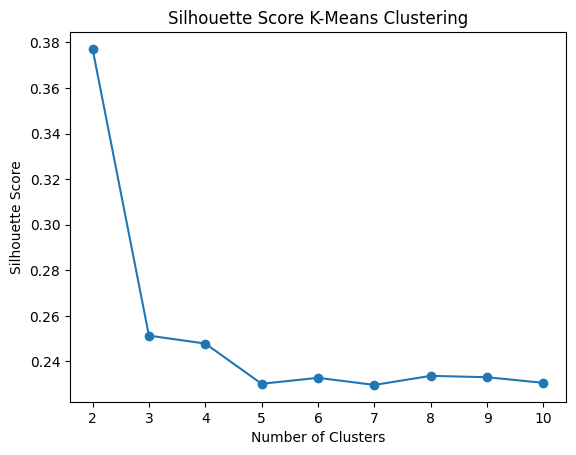

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inisialisasi daftar untuk menyimpan nilai skor siluet
silhuette_X = X_train
silhouette_scores = []

# Melakukan KMeans untuk jumlah klaster dari 2 hingga 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(silhuette_X)
    silhouette_avg = silhouette_score(silhuette_X, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot perubahan skor siluet
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(X_scaled, y_km)

new_row = {"Model": f"K-Means {X_column} {y_column} SS", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Review Rating SS,0.175852


In [ ]:
score = silhouette_score(X_scaled_mm, y_km_mm)

new_row = {"Model": f"K-Means {X_column} {y_column} MM", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
1,K-Means Age Review Rating MM,0.248276
0,K-Means Age Review Rating SS,0.175852


In [ ]:
pd.DataFrame(y_km).value_counts()

0    1248
2     975
3     852
1     825
dtype: int64

In [ ]:
kmeans = pd.DataFrame(y_km, columns=["KMeans Cluster"])
kmeans

,KMeans Cluster
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=6)

# Fit model and predict clusters
y_pred = AC.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.12407515911278226


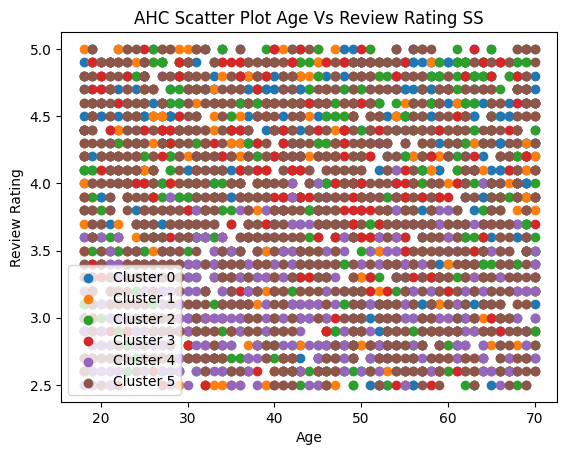

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_pred)
for label in unique_labels:
    plt.scatter(X[y_pred == label][X_column], X[y_pred == label][y_column], label=f'Cluster {label}')

plt.title(f"AHC Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=6)

# Fit model and predict clusters
y_pred_mm = AC.fit_predict(X_scaled_mm)

score = silhouette_score(X_scaled_mm, y_pred_mm)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.2515630282649584


In [ ]:
np.unique(y_km_mm)

array([0, 1, 2, 3], dtype=int32)

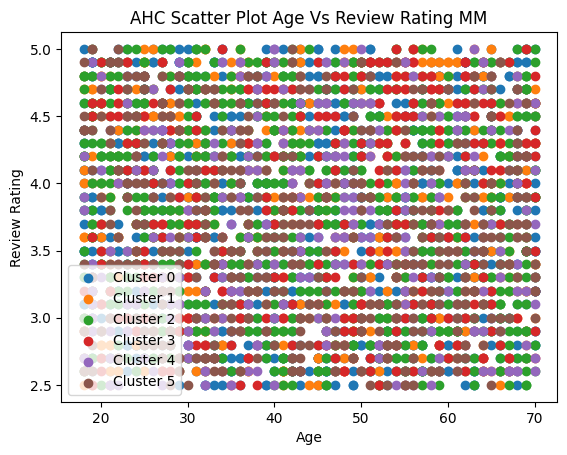

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(y_pred_mm)
for label in unique_labels:
    plt.scatter(X[y_pred_mm == label][X_column], X[y_pred_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"AHC Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

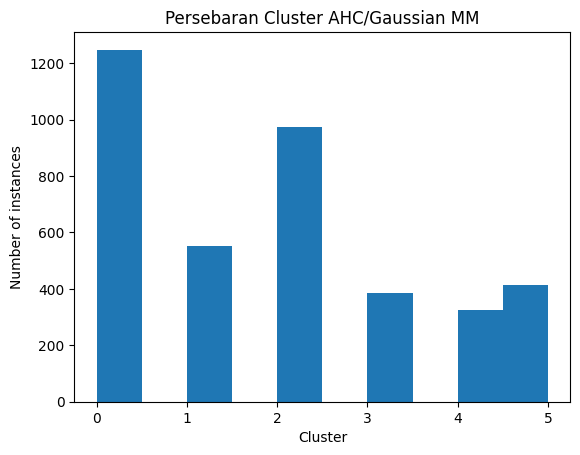

In [ ]:
plt.hist(y_pred_mm)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster AHC/Gaussian MM')
plt.show()

In [ ]:
ahc = pd.DataFrame(y_pred, columns=["AHC Cluster"])
ahc

,AHC Cluster
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [ ]:
score = silhouette_score(X_scaled, y_pred)

new_row = {"Model": f"AHC {X_column} {y_column} SS (6 Cluster)", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
3,AHC Age Review Rating MM,0.433141
5,Gaussian Age Review Rating MM,0.433141
2,AHC Age Review Rating SS,0.282650
4,Gaussian Age Review Rating SS,0.282650
1,K-Means Age Review Rating MM,0.248276
0,K-Means Age Review Rating SS,0.175852
6,AHC Age Review Rating SS (6 Cluster),0.124075


In [ ]:
score = silhouette_score(X_scaled_mm, y_pred_mm)

new_row = {"Model": f"AHC {X_column} {y_column} MM (6 Cluster)", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
3,AHC Age Review Rating MM,0.433141
5,Gaussian Age Review Rating MM,0.433141
2,AHC Age Review Rating SS,0.282650
4,Gaussian Age Review Rating SS,0.282650
7,AHC Age Review Rating MM (6 Cluster),0.251563
1,K-Means Age Review Rating MM,0.248276
0,K-Means Age Review Rating SS,0.175852
6,AHC Age Review Rating SS (6 Cluster),0.124075


## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

Tidak digunakan akibat persebaran data ini gak cocok dengan density based algorithm

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score

# # Inisialisasi model DBSCAN
# DB = DBSCAN(eps=0.5, min_samples=5)

# # Melakukan prediksi klaster dengan DBSCAN
# y_pred_db = DB.fit_predict(X_scaled)

# # Menghitung Silhouette Score
# score_db = silhouette_score(X_scaled, y_pred_db)
# print(f"Silhouette Score: {score_db}")

In [ ]:
# labels = DB.labels_

# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_clusters

## Gaussian Mixture Model


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Create an instance of Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the model to the data
gmm.fit(X_scaled)

# Predict cluster labels
labels = gmm.predict(X_scaled)

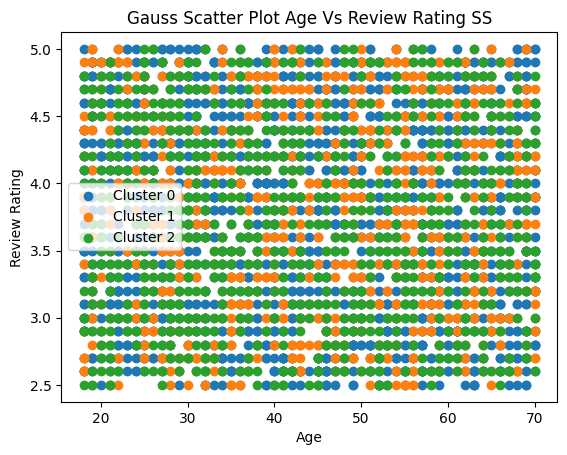

In [ ]:
# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(labels)
for label in unique_labels:
    plt.scatter(X[labels == label][X_column], X[labels == label][y_column], label=f'Cluster {label}')

plt.title(f"Gauss Scatter Plot {X_column} Vs {y_column} SS")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

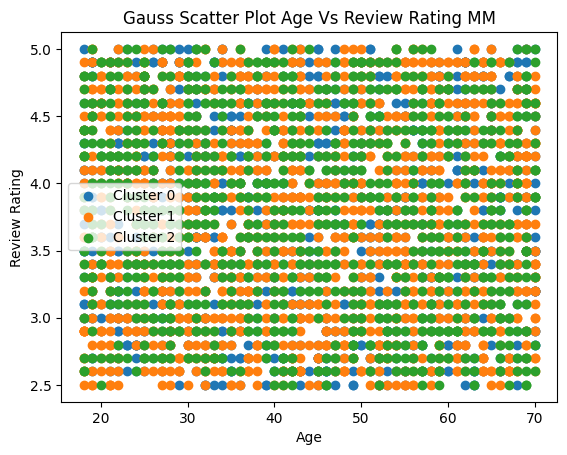

In [ ]:
# Create an instance of Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the model to the data
gmm.fit(X_scaled_mm)

# Predict cluster labels
labels_mm = gmm.predict(X_scaled_mm)

# Assume 'X' is your features and 'y_km' are the labels from clustering
unique_labels = np.unique(labels_mm)
for label in unique_labels:
    plt.scatter(X[labels_mm == label][X_column], X[labels_mm == label][y_column], label=f'Cluster {label}')

plt.title(f"Gauss Scatter Plot {X_column} Vs {y_column} MM")
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18787691488345806


In [ ]:
silhouette_avg = silhouette_score(X_scaled_mm, labels_mm)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3870315970958751


In [ ]:
score = silhouette_score(X_scaled, labels)

new_row = {"Model": f"Gaussian {X_column} {y_column} SS (3 Cluster)", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
3,AHC Age Review Rating MM,0.433141
5,Gaussian Age Review Rating MM,0.433141
2,AHC Age Review Rating SS,0.282650
4,Gaussian Age Review Rating SS,0.282650
7,AHC Age Review Rating MM (6 Cluster),0.251563
1,K-Means Age Review Rating MM,0.248276
8,Gaussian Age Review Rating SS (3 Cluster),0.187877
0,K-Means Age Review Rating SS,0.175852
6,AHC Age Review Rating SS (6 Cluster),0.124075


In [ ]:
score = silhouette_score(X_scaled_mm, labels_mm)

new_row = {"Model": f"Gaussian {X_column} {y_column} MM (3 Cluster)", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
3,AHC Age Review Rating MM,0.433141
5,Gaussian Age Review Rating MM,0.433141
9,Gaussian Age Review Rating MM (3 Cluster),0.387032
2,AHC Age Review Rating SS,0.282650
4,Gaussian Age Review Rating SS,0.282650
7,AHC Age Review Rating MM (6 Cluster),0.251563
1,K-Means Age Review Rating MM,0.248276
8,Gaussian Age Review Rating SS (3 Cluster),0.187877
0,K-Means Age Review Rating SS,0.175852
6,AHC Age Review Rating SS (6 Cluster),0.124075


In [ ]:
gauss = pd.DataFrame(labels, columns=["Gaussian Cluster"])
gauss

,Gaussian Cluster
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


## Mean-Shift clustering algorithm

In [ ]:
# from numpy import unique
# from numpy import where
# from matplotlib import pyplot
# from sklearn.datasets import make_classification
# from sklearn.cluster import MeanShift

# # define the model
# mean_model = MeanShift()

# # assign each data point to a cluster
# mean_result = mean_model.fit_predict(X_scaled)

# # get all of the unique clusters
# mean_clusters = unique(mean_result)

# # plot Mean-Shift the clusters
# for mean_cluster in mean_clusters:
#     # get data points that fall in this cluster
#     index = where(mean_result == mean_cluster)
#     # make the plot
#     pyplot.scatter(training_data[index, 0], training_data[index, 1])

# # show the Mean-Shift plot
# pyplot.show()

In [ ]:
# from sklearn.metrics import silhouette_score

# # Menghitung Silhouette Score
# silhouette_avg = silhouette_score(training_data, mean_result)
# print("Silhouette Score:", silhouette_avg)

## K-Modes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 186, cost: 42749.0
Run 1, iteration: 2/100, moves: 85, cost: 42707.0
Run 1, iteration: 3/100, moves: 45, cost: 42699.0
Run 1, iteration: 4/100, moves: 12, cost: 42699.0


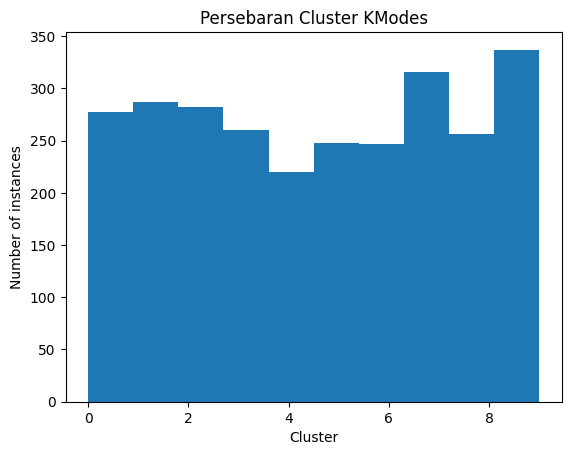

In [ ]:
from kmodes.kmodes import KModes

# Misalkan data Anda disimpan dalam DataFrame `data`
km = KModes(n_clusters=4, init='Cao', verbose=1)

kmode_cluster = km.fit_predict(min_df)

plt.hist(clusters)
plt.xlabel('Cluster')
plt.ylabel('Number of instances')
plt.title('Persebaran Cluster KModes')
plt.show()

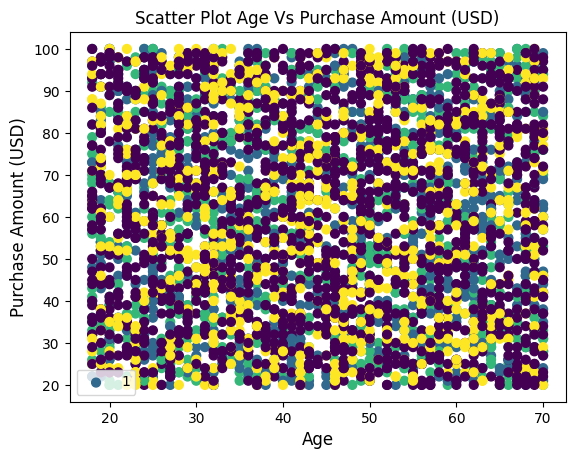

In [ ]:
# Plot clusters
plt.scatter(min_df[X_column], min_df[y_column], c=kmode_cluster, s=40, cmap='viridis')
plt.title(f"Scatter Plot {X_column} Vs {y_column}")
plt.xlabel(X_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

plt.legend(kmode_cluster)
plt.show()

In [ ]:
# Hitung skor siluet
silhouette_avg = silhouette_score(min_df, kmode_cluster, metric='hamming')

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.02544862390175614


In [ ]:
score = silhouette_score(min_df, kmode_cluster, metric='hamming')

new_row = {"Model": f"KModes {X_column} {y_column} SS (All Column)", "Silhouette Score": score}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Purchase Amount (USD) SS,0.413719
1,K-Means Age Purchase Amount (USD) MM,0.413657
4,Gaussian Age Purchase Amount (USD) SS,0.413624
5,Gaussian Age Purchase Amount (USD) MM,0.413615
2,AHC Age Purchase Amount (USD) SS,0.372396
3,AHC Age Purchase Amount (USD) MM,0.350095
6,KModes Age Purchase Amount (USD) SS (All Column),0.025449


## K-Prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 268, ncost: 163666.94095643234
Run: 1, iteration: 2/20, moves: 126, ncost: 162651.5179955465
Run: 1, iteration: 3/20, moves: 2, ncost: 162646.49384858055
Run: 1, iteration: 4/20, moves: 0, ncost: 162646.49384858055
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 456, ncost: 169726.32613635188
Run: 2, iteration: 2/20, moves: 186, ncost: 167049.62172339478
Run: 2, iteration: 3/20, moves: 172, ncost: 165138.2284814064
Run: 2, iteration: 4/20, moves: 138, ncost: 164178.70572049194
Run: 2, iteration: 5/20, moves: 87, ncost: 163629.41082823853
Run: 2, iteration: 6/20, moves: 77, ncost: 163231.28173164226
Run: 2, iteration: 7/20, moves: 88, ncost: 162688.6108962361
Run: 2, iteration: 8/20, moves: 1, ncost: 162686.16555196067
Run: 2, iteration: 9

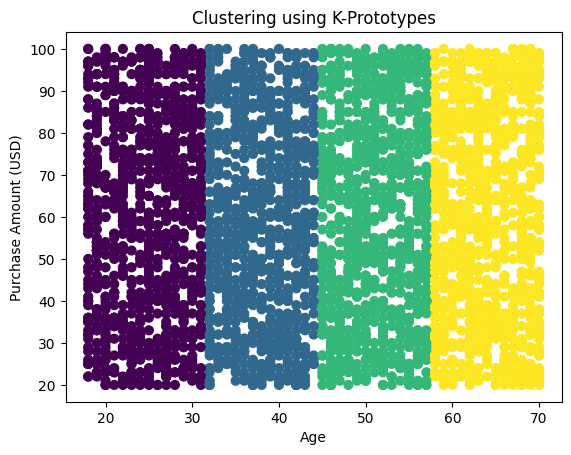

In [ ]:
marketing_df = min_df.copy()

# Convert DataFrame to numpy array
mark_array = marketing_df.values

# Convert certain columns to float type
mark_array[:, 0] = mark_array[:, 0].astype(float)
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array[:, 11] = mark_array[:, 11].astype(float)

# Perform clustering using K-Prototypes
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto_clusters = kproto.fit_predict(mark_array, categorical=[1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16])

# Print cluster centroids
print(kproto.cluster_centroids_)

# Assign clusters to dataframe
marketing_df['cluster'] = kproto_clusters

# Get cluster counts
cluster_counts = marketing_df["cluster"].value_counts()
print(cluster_counts)

# Plot clusters
plt.scatter(marketing_df["Age"], marketing_df["Purchase Amount (USD)"], c=marketing_df["cluster"], s=40, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Clustering using K-Prototypes')
plt.show()


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(min_df, kproto_clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.034528124358205174


In [ ]:
new_row = {"Model": f"K-Prototypes {X_column} {y_column} (All Column)", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Purchase Amount (USD) SS,0.413719
1,K-Means Age Purchase Amount (USD) MM,0.413657
4,Gaussian Age Purchase Amount (USD) SS,0.413624
5,Gaussian Age Purchase Amount (USD) MM,0.413615
2,AHC Age Purchase Amount (USD) SS,0.372396
3,AHC Age Purchase Amount (USD) MM,0.350095
7,K-Prototypes Age Purchase Amount (USD) (All Co...,0.034528
6,KModes Age Purchase Amount (USD) SS (All Column),0.025449


## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

In [ ]:
from sklearn.cluster import Birch
import numpy as np

# Instantiate BIRCH clustering model
birch = Birch(n_clusters=4)

# Fit the model to the data
birch.fit(X_scaled)

# Get cluster labels
labels = birch.labels_

# Print cluster labels
print("Cluster labels:", labels)

In [ ]:
plt.scatter(min_df['Age'], min_df['Purchase Amount (USD)'], c=labels, cmap='viridis', s=40)
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('BIRCH Clustering')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)

print("Silhouette Score:", silhouette_avg)

In [ ]:
new_row = {"Model": f"BIRCH {X_column} {y_column} (All Column)", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Purchase Amount (USD) SS,0.413719
1,K-Means Age Purchase Amount (USD) MM,0.413657
4,Gaussian Age Purchase Amount (USD) SS,0.413624
5,Gaussian Age Purchase Amount (USD) MM,0.413615
2,AHC Age Purchase Amount (USD) SS,0.372396
3,AHC Age Purchase Amount (USD) MM,0.350095
8,BIRCH Age Purchase Amount (USD) (All Column),0.144898
7,K-Prototypes Age Purchase Amount (USD) (All Co...,0.034528
6,KModes Age Purchase Amount (USD) SS (All Column),0.025449


In [ ]:
# Instantiate BIRCH clustering model
birch = Birch(n_clusters=4)

# Fit the model to the data
birch.fit(X_scaled)

# Get cluster labels
labels = birch.labels_

# Print cluster labels
print("Cluster labels:", labels)

Cluster labels: [2 0 2 ... 1 0 2]


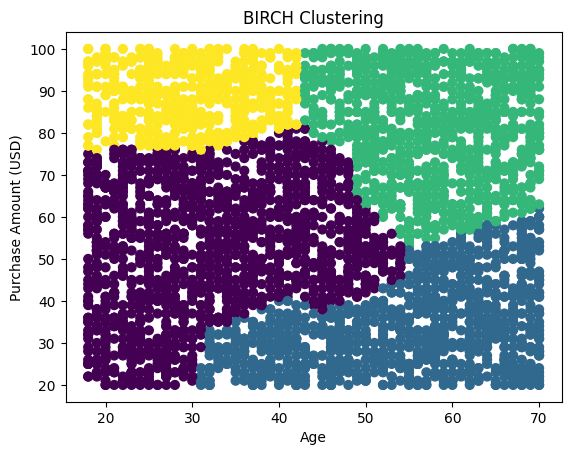

In [ ]:
plt.scatter(min_df['Age'], min_df['Purchase Amount (USD)'], c=labels, cmap='viridis', s=40)
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('BIRCH Clustering')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3367598353909534


In [ ]:
new_row = {"Model": f"BIRCH {X_column} {y_column} (All Column)", "Silhouette Score": silhouette_avg}
clus_score = pd.concat([clus_score, pd.DataFrame([new_row])], ignore_index=True)

clus_score.sort_values(by="Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Purchase Amount (USD) SS,0.413719
1,K-Means Age Purchase Amount (USD) MM,0.413657
4,Gaussian Age Purchase Amount (USD) SS,0.413624
5,Gaussian Age Purchase Amount (USD) MM,0.413615
2,AHC Age Purchase Amount (USD) SS,0.372396
3,AHC Age Purchase Amount (USD) MM,0.350095
9,BIRCH Age Purchase Amount (USD) (All Column),0.336760
8,BIRCH Age Purchase Amount (USD) (All Column),0.144898
7,K-Prototypes Age Purchase Amount (USD) (All Co...,0.034528
6,KModes Age Purchase Amount (USD) SS (All Column),0.025449


## Evaluation

In [ ]:
from sklearn import metrics

def evaluate_clustering(labels_pred, data):
    print("Silhouette Score:", metrics.silhouette_score(data, labels_pred))
    print("Davies-Bouldin Index:", metrics.davies_bouldin_score(data, labels_pred))
    print("Calinski-Harabasz Index:", metrics.calinski_harabasz_score(data, labels_pred))
    # print("Dunn Index:", metrics.dunn_index(data, labels_pred))

In [ ]:
print("KMeans Clustering SS")
evaluate_clustering(y_km, X_scaled)

KMeans Clustering SS
Silhouette Score: 0.41371897317039286
Davies-Bouldin Index: 0.7633216032017245
Calinski-Harabasz Index: 3988.1827788443434


In [ ]:
print("KMeans Clustering MM")
evaluate_clustering(y_km_mm, X_scaled_mm)

KMeans Clustering MM
Silhouette Score: 0.41365724412627897
Davies-Bouldin Index: 0.764739536941862
Calinski-Harabasz Index: 3988.691788166963


In [ ]:
print("Agglomerative Clustering SS")
evaluate_clustering(y_pred, X_scaled)

Agglomerative Clustering SS
Silhouette Score: 0.3723963462947772
Davies-Bouldin Index: 0.8328613808231153
Calinski-Harabasz Index: 3331.272482643654


In [ ]:
print("Agglomerative Clustering MM")
evaluate_clustering(y_pred_mm, X_scaled_mm)

Agglomerative Clustering MM
Silhouette Score: 0.35009510587047377
Davies-Bouldin Index: 0.8865070706124719
Calinski-Harabasz Index: 3096.5116826111835


In [ ]:
print("Gaussian Mixture Model SS")
evaluate_clustering(labels, X_scaled)

Gaussian Mixture Model SS
Silhouette Score: 0.3367598353909534
Davies-Bouldin Index: 0.890599728412333
Calinski-Harabasz Index: 2819.0490813235865


In [ ]:
print("Gaussian Mixture Model MM")
evaluate_clustering(labels_mm, X_scaled_mm)

Gaussian Mixture Model MM
Silhouette Score: 0.41361499873161905
Davies-Bouldin Index: 0.7655228207891792
Calinski-Harabasz Index: 3986.49994806036


Business Insights

1. Spesific :
2. Measurable :
3. Action Oriented
4. Relevant :
5. Time Bound : This project final presentation are in 23 March 2024

Business Questions:

1. Bagaimana customer habits and behavior berdasarkan wilayah regional mereka (Dalam Amerika Serikat)
2. Bagaimana sifat mereka dengan pengelompokan umur
3. Seberapa baik dalam melakukan clustering (pengelompokan) dengan Feature Selection

# Fine Tuning Work

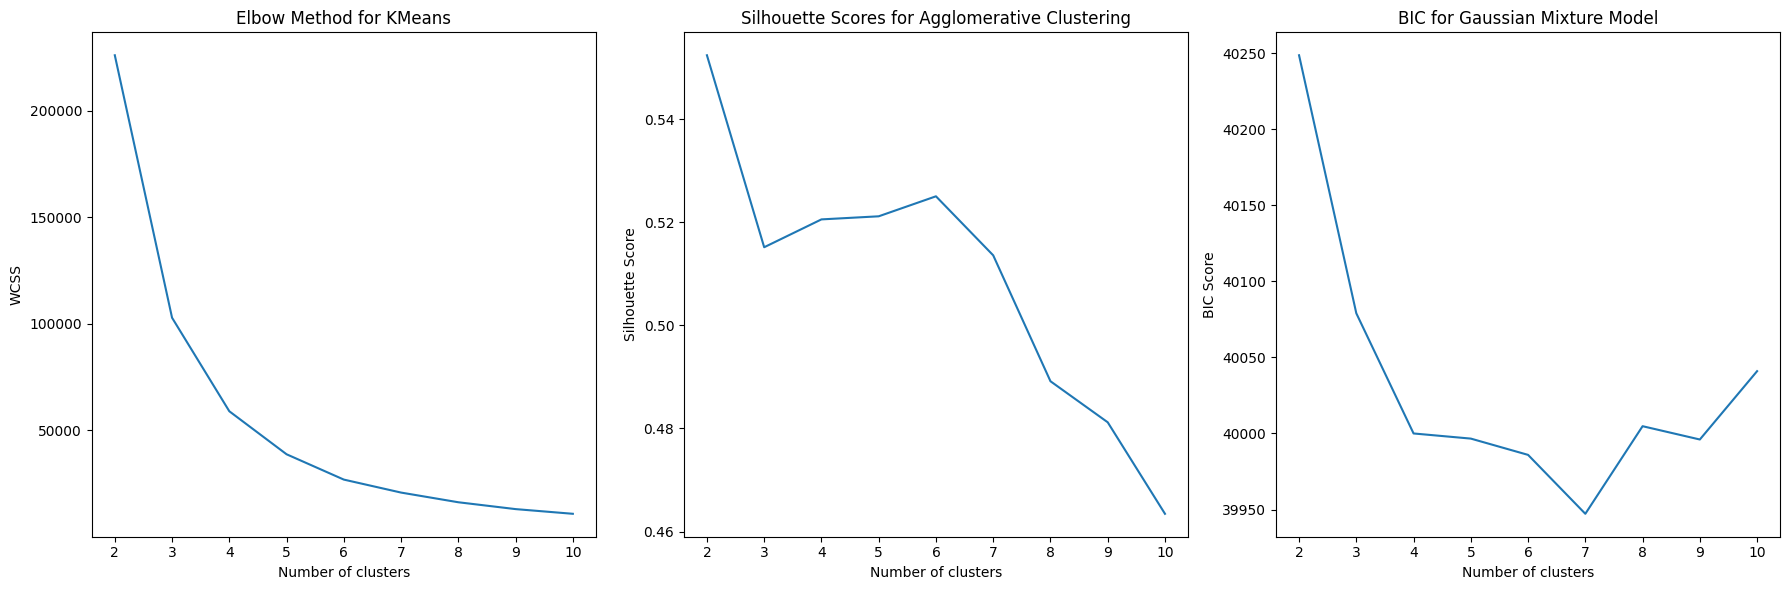

In [ ]:
# Assuming 'process_data' is a DataFrame and 'X_column', 'y_column' are defined
# For demonstration, let's create a dummy 'features' variable
features = min_df[[X_column, y_column]]
np.random.seed(0)

# Initialize lists to store metrics
wcss = []  # For KMeans
silhouette_scores_agglomerative = []  # For Agglomerative Clustering
bic_scores = []  # For Gaussian Mixture Model

# Range of potential clusters
n_clusters_range = range(2, 11)

# Elbow Method for KMeans
for i in n_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Adapting for Agglomerative Clustering (using silhouette scores as a substitute metric)
for i in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=i)
    labels = agglomerative.fit_predict(features)
    silhouette_scores_agglomerative.append(silhouette_score(features, labels))

# Adapting for Gaussian Mixture Model (using BIC as a metric)
for i in n_clusters_range:
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(features)
    bic_scores.append(gmm.bic(features))

# Plotting the results for each method
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(n_clusters_range, silhouette_scores_agglomerative)
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(n_clusters_range, bic_scores)
plt.title('BIC for Gaussian Mixture Model')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')

plt.tight_layout()
plt.show()


## KModes Fine Tuning

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 58, cost: 18967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 316, cost: 18357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 525, cost: 18332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 103, cost: 16093.0
Run 4, iteration: 2/100, moves: 0, cost: 16093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 517, cost: 18877.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 15674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 479, cost: 15107.0
Run 2, iterati

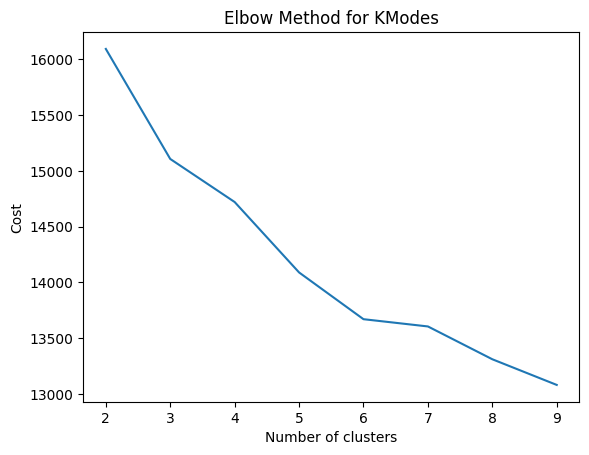

In [ ]:
from kmodes.kmodes import KModes

costs = []
for num_clusters in range(2, 10):
    kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
    clusters = kmodes.fit_predict(X_scaled)
    costs.append(kmodes.cost_)

plt.plot(range(2, 10), costs)
plt.title('Elbow Method for KModes')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

## K-Prototypes Fine Tuning

## BIRCH Fine Tuning

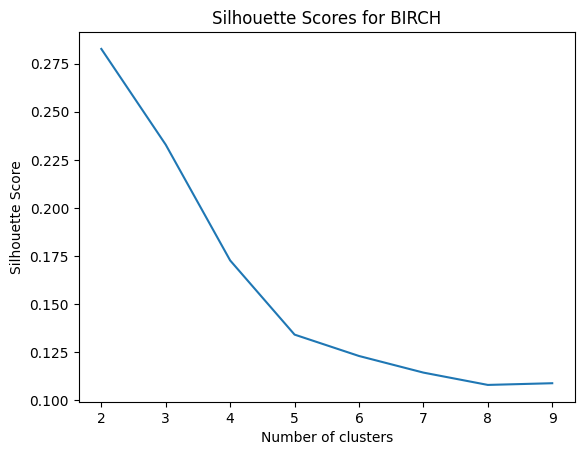

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

silhouette_scores = []
for num_clusters in range(2, 10):
    birch = Birch(n_clusters=num_clusters)
    labels = birch.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Scores for BIRCH')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Conclusion

In [ ]:
# clus_score.sort_values("Silhouette Score", ascending=False)

,Model,Silhouette Score
0,K-Means Age Purchase Amount (USD) SS,0.413719
1,K-Means Age Purchase Amount (USD) MM,0.413657
4,Gaussian Age Purchase Amount (USD) SS,0.413624
5,Gaussian Age Purchase Amount (USD) MM,0.413615
2,AHC Age Purchase Amount (USD) SS,0.372396
3,AHC Age Purchase Amount (USD) MM,0.350095
9,BIRCH Age Purchase Amount (USD) (All Column),0.336760
8,BIRCH Age Purchase Amount (USD) (All Column),0.144898
7,K-Prototypes Age Purchase Amount (USD) (All Co...,0.034528
6,KModes Age Purchase Amount (USD) SS (All Column),0.025449


In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

,Model,Silhouette Score
1,K-Means Age Purchase Amount (USD) MM,0.159789
3,AHC Age Purchase Amount (USD) MM,0.159789
5,Gaussian Age Purchase Amount (USD) MM,0.159789
0,K-Means Age Purchase Amount (USD) SS,0.068506
2,AHC Age Purchase Amount (USD) SS,0.065037
4,Gaussian Age Purchase Amount (USD) SS,0.064747


In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

,Model,Silhouette Score
5,Gaussian Age Review Rating MM,0.262356
3,AHC Age Review Rating MM,0.253236
1,K-Means Age Review Rating MM,0.248276
0,K-Means Age Review Rating SS,0.175852
4,Gaussian Age Review Rating SS,0.172418
2,AHC Age Review Rating SS,0.170444


In [ ]:
clus_score.sort_values("Silhouette Score", ascending=False)

,Model,Silhouette Score
3,AHC Age Review Rating MM,0.433141
5,Gaussian Age Review Rating MM,0.433141
2,AHC Age Review Rating SS,0.282650
4,Gaussian Age Review Rating SS,0.282650
1,K-Means Age Review Rating MM,0.248276
0,K-Means Age Review Rating SS,0.175852


In [ ]:
import pickle
from sklearn.cluster import KMeans

# Assuming 'X' is your data and 'model' is your trained KMeans model

# Train your model
model = KMeans(n_clusters=3)
model.fit(X)

# Save the trained model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

NameError: name 'X' is not defined